## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

## Load the DataSet

In [2]:
df = pd.read_csv("C:\\Users\\Vamshi\\Downloads\\TeslaStocks.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
# Select the closing price as predictor variable
data = df.filter(['Close']).values

### SPLIT THE DATASET INTO TRAINING AND TESTING SETS

In [5]:
train_data_len = int(np.ceil(0.8 * len(data)))
train_data = data[0:train_data_len,:]
test_data = data[train_data_len:,:]

In [6]:
# Normalize data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

## Creating LSTM Model

In [7]:
# Create training data for LSTM model
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

## Reshape the Model

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))    

## Create LSTM Model

In [9]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(30, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
# Train LSTM model
model.fit(X_train, y_train, epochs=20, batch_size=64)

# Test LSTM model
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

Epoch 1/20
21/21 [==============================] - 9s 90ms/step - loss: 0.0639
Epoch 2/20
21/21 [==============================] - 2s 91ms/step - loss: 0.0049
Epoch 3/20
21/21 [==============================] - 2s 92ms/step - loss: 0.0016
Epoch 4/20
21/21 [==============================] - 2s 94ms/step - loss: 0.0014
Epoch 5/20
21/21 [==============================] - 2s 91ms/step - loss: 0.0013
Epoch 6/20
21/21 [==============================] - 2s 94ms/step - loss: 0.0013
Epoch 7/20
21/21 [==============================] - 2s 94ms/step - loss: 0.0013
Epoch 8/20
21/21 [==============================] - 2s 91ms/step - loss: 0.0013
Epoch 9/20
21/21 [==============================] - 2s 95ms/step - loss: 0.0013
Epoch 10/20
21/21 [==============================] - 2s 97ms/step - loss: 0.0012
Epoch 11/20
21/21 [==============================] - 2s 94ms/step - loss: 0.0012
Epoch 12/20
21/21 [==============================] - 2s 96ms/step - loss: 0.0011
Epoch 13/20
21/21 [==================

## Plot and Visualisation

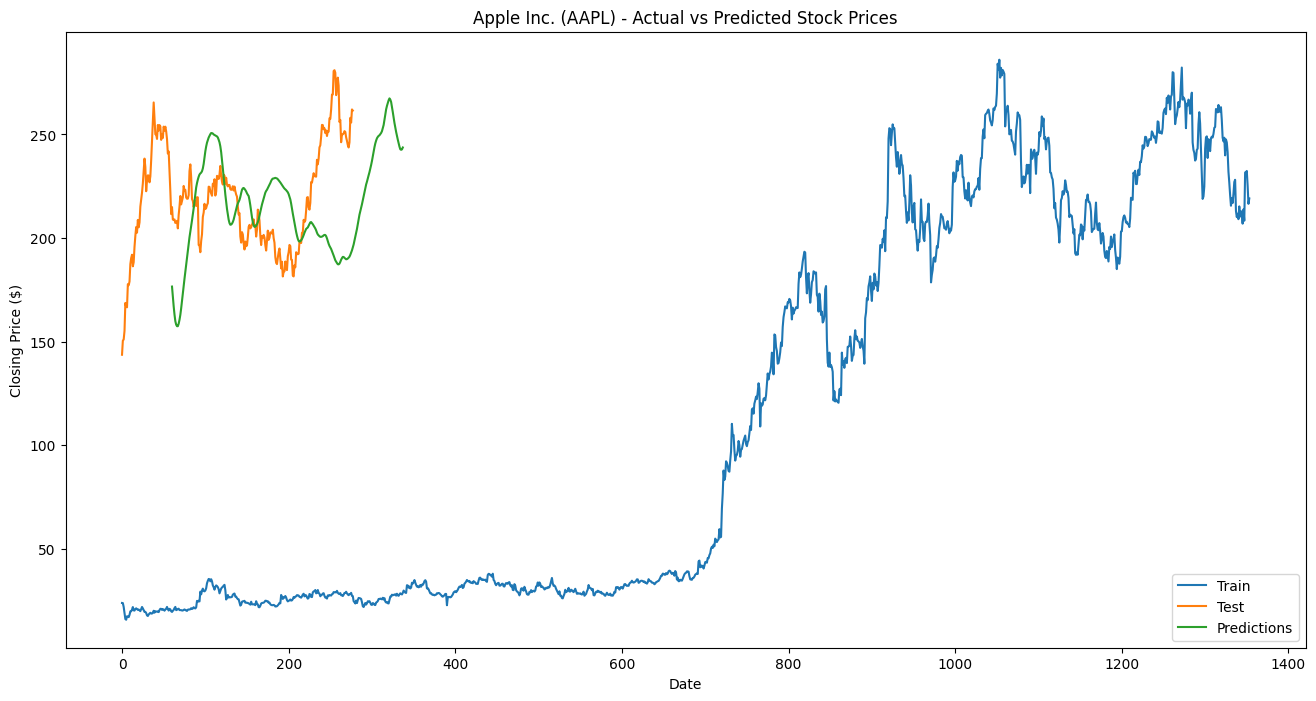

In [11]:
# Plot actual vs predicted stock prices
train = data[:train_data_len]
test = data[train_data_len+time_step:]
test_predictions = np.empty_like(test_data)
test_predictions[:, :] = np.nan
test_predictions[len(test_data)-len(predictions):, :] = predictions
plt.figure(figsize=(16,8))
plt.title('Apple Inc. (AAPL) - Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.plot(train[:, 0])
plt.plot(test[:, 0])
plt.plot(test_predictions[:, 0])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()